### PENGERTIAN
Principal Component Analysis (PCA) merupakan teknik mereduksi suatu set variabel yang berdimensi tinggi 
menjadi lebih rendah namun masih mengandung sebagian besar informasi dari data awal. Misalkan dari 100 
variabel yang ada, kita hanya memakai 10 variabel saja untuk dianalisis (dimensi yang awalnya 100 menjadi 10 saja).

Terdapat dua fungsi utama dari PCA yaitu reduksi dan transformasi. Fungsi reduksi digunakan untuk 
mengurangi jumlah variabel (yang awalnya sangat banyak) menjadi lebih sedikit sehingga memudahkan 
analisis pada tahap selanjutnya. Sedangkan fungsi transformasi digunakan untuk mengubah variabel 
yang awalnya saling berkorelasi menjadi tidak saling berkorelasi.

### ISTILAH PENTING
Berikut merupakan istilah – istilah penting di PCA

1. Communality
2. Eigenvalue
3. Sphericity test
4. Factor
5. Factor Loading
6. Factor Matrix
7. Factor Score
8. PC Score
9. Factor Analysis vs PCA
10. Rotasi Matrix

### Berikut merupakan tahapan-tahapan dalam melakukan PCA 
- Step 1: Standarisasi data
- Step 2: Menghitung matrik covariance/korelasi
- Step 3: Menghitung nilai eigen
- Step 4: Menghitung PC .
- Step 5: Reduksi Dimensi

## IMPORT DATA

data yang digunakan dalam contoh ini adalah data iris.

In [114]:
## Import Package
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 

In [2]:
## Load data iris
iris = datasets.load_iris()

In [10]:
X = iris['data'] 

In [11]:
y = iris['target']

In [32]:
## Mengubah format data iris dari array ke dataframe

In [29]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
df_X = pd.DataFrame(X)

In [60]:
df_X.columns =  iris.feature_names ## Assign nama kolom

In [27]:
df_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
df_y = pd.DataFrame(y)

In [38]:
df_y.columns = ['target']

In [39]:
df_y.head()

,target
0,0
1,0
2,0
3,0
4,0


## Standardize

In [41]:
X_Scale = StandardScaler().fit_transform(df_X)

In [46]:
dfX_Scale = pd.DataFrame(X_Scale,columns=iris.feature_names )

In [47]:
dfX_Scale

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


## PCA

In [52]:
### Misal kita pilih n = k
pca = PCA(n_components = 4) 

In [56]:
### Variabel PC
principalComponents = pca.fit_transform(dfX_Scale)

In [57]:
principalComponents_Df = pd.DataFrame(principalComponents,columns=['PC1','PC2','PC3','PC4'])

In [58]:
principalComponents_Df.head()

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


## Eigen Value & Eigen Vector

In [64]:
### Nilai Eigen
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [67]:
### Berapa persen suatu PC mampu menjelaskan keragaman data
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

## Pemilihan Banyaknya Dimensi

1. Penentuan banyaknya dimensi yang akan diambil bisa berdasarkan nilai eigen atau nilai variance komulatif
2. Menurut Dillon & Goldstein (1984), PC yang Nilai eigen yang lebih dari 1 yang akan diambil 
3. Menurut (Marison,1976) PC yang nilai komulatif variance yang lebih dari 75%

Berdasarkan kriteria di atas, banyaknya dimensi yang bisa dibentk bisa 1 (jika pakai eigenvalue) atau 2 (jika pakai komulaitif variance explained)

Kita akan ambil 2 dimensi saja

## Penerapan PCA sebagai Explorasi

PCA dapat digunakan sebagai explorasi data. Karena princip PCA adalah membentuk variabel baru dari dimensi yang tinggi menjadi dimensi rendah, maka kita bisa melihat pattern berdasarkan variabel baru (variabel PC). Kita buat plot saja antara variabel tersebut. Visualisasi paling mudah adalah visualisasi 2 Dimensi.

In [76]:
### kita pilih banyak dimensi = 2
pca = PCA(n_components = 2) 

In [77]:
PC = pca.fit_transform(X_Scale)

In [83]:
df_PC = pd.DataFrame(PC,columns=['PC1','PC2'])

In [84]:
df_PC.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [85]:
df_y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [90]:
def Encoding(x):
    label = []
    if x == 0:
        label = 'setosa'
    elif x == 1:
        label = 'versicolor'
    elif x == 2:
        label = 'virginica'
    return label

In [107]:
df_y['label'] = df_y['target'].apply(Encoding)

In [108]:
DF = pd.concat([df_PC,df_y],axis=1,ignore_index=True)

In [109]:
DF.columns = ['PC1','PC2','target','label']

In [110]:
DF.head()

,PC1,PC2,target,label
0,-2.264703,0.480027,0,setosa
1,-2.080961,-0.674134,0,setosa
2,-2.364229,-0.341908,0,setosa
3,-2.299384,-0.597395,0,setosa
4,-2.389842,0.646835,0,setosa


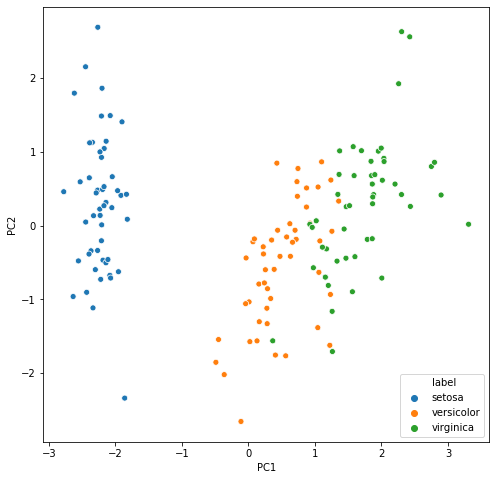

In [113]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
sns.scatterplot(DF.PC1,DF.PC2,hue=DF.label)
plt.show()

Berdasarkan visualisasi PC1 dan PC2, terlihat bahwa objek mempunyai karakteristik yang mirip akan mengelompok. Variabel PC1 dan PC2 ini bisa digunakan untuk mengidentifikasi objek baru masuk kategori yang mana.

## Penerapan PCA sebagai transformasi

PCA dapat digunakan sebagai alat untuk mengatasi masalah multikolinieritas. Berbeda dengan  Sebaiknya, variabel yang digunakan semuanya agar informasi yang ada tidak hilang banyak. Model ini sering disebut dengan RIDGE REGRESSION

Penggunaannya cukup mudah yaitu, variabel X diganti dengan variabel PC. Lalu lajutkan ke analisis selanjutnya. Misal
- model lama => Y = X1 + X2 + X3 + X4
- model baru => Y = PC1 + PC2 + PC3 + PC4

In [115]:
classifier = LogisticRegression(random_state = 0)

In [119]:
classifier.fit(df_PC,df_y['target'])

C:\Users\ARofiqi Maulana\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ARofiqi Maulana\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
## Model Regresi Logistik
classifier.coef_

array([[-2.64674046,  0.8386255 ],
       [ 0.36426818, -1.1407789 ],
       [ 2.50703344,  0.14881474]])